# K Nearest Neighbors Project on Classified Data

### A). Project 2 : Overview

* You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes.

* We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

### B). Import packages

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Read csv file and get some high level information on the data

In [33]:
df = pd.read_csv("Input_Data/KNN_Project_Data")
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

In [34]:
#check datatype and null info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.0 KB


In [35]:
#check statistical info
df.describe()

XVPM         GWYH         TRAT         TLLZ         IGGA  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1055.071157   991.851567  1529.373525   495.107156   940.590072   
std     370.980193   392.278890   640.286092   142.789188   345.923136   
min      21.170000    21.720000    31.800000     8.450000    17.930000   
25%     767.413366   694.859326  1062.600806   401.788135   700.763295   
50%    1045.904805   978.355081  1522.507269   500.197421   939.348662   
75%    1326.065178  1275.528770  1991.128626   600.525709  1182.578166   
max    2117.000000  2172.000000  3180.000000   845.000000  1793.000000   

              HYKR         EDFS         GUUB         MGJM         JHZC  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1550.637455  1561.003252   561.346117  1089.067338  1452.521629   
std     493.491988   598.608517   247.357552   402.666953   568.132005   
min      27.930000    31.960000    13.520000    23.210000    30.890000   
25%    1219.267077  1132.097865   381.704293   801.849802  1059.499689   
50%    1564.996551  1565.882879   540.420379  1099.087954  1441.554053   
75%    1891.937040  1981.739411   725.762027  1369.923665  1864.405512   
max    2793.000000  3196.000000  1352.000000  2321.000000  3089.000000   

       TARGET CLASS  
count    1000.00000  
mean        0.50000  
std         0.50025  
min         0.00000  
25%         0.00000  
50%         0.50000  
75%         1.00000  
max         1.00000

### EDA

#### Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


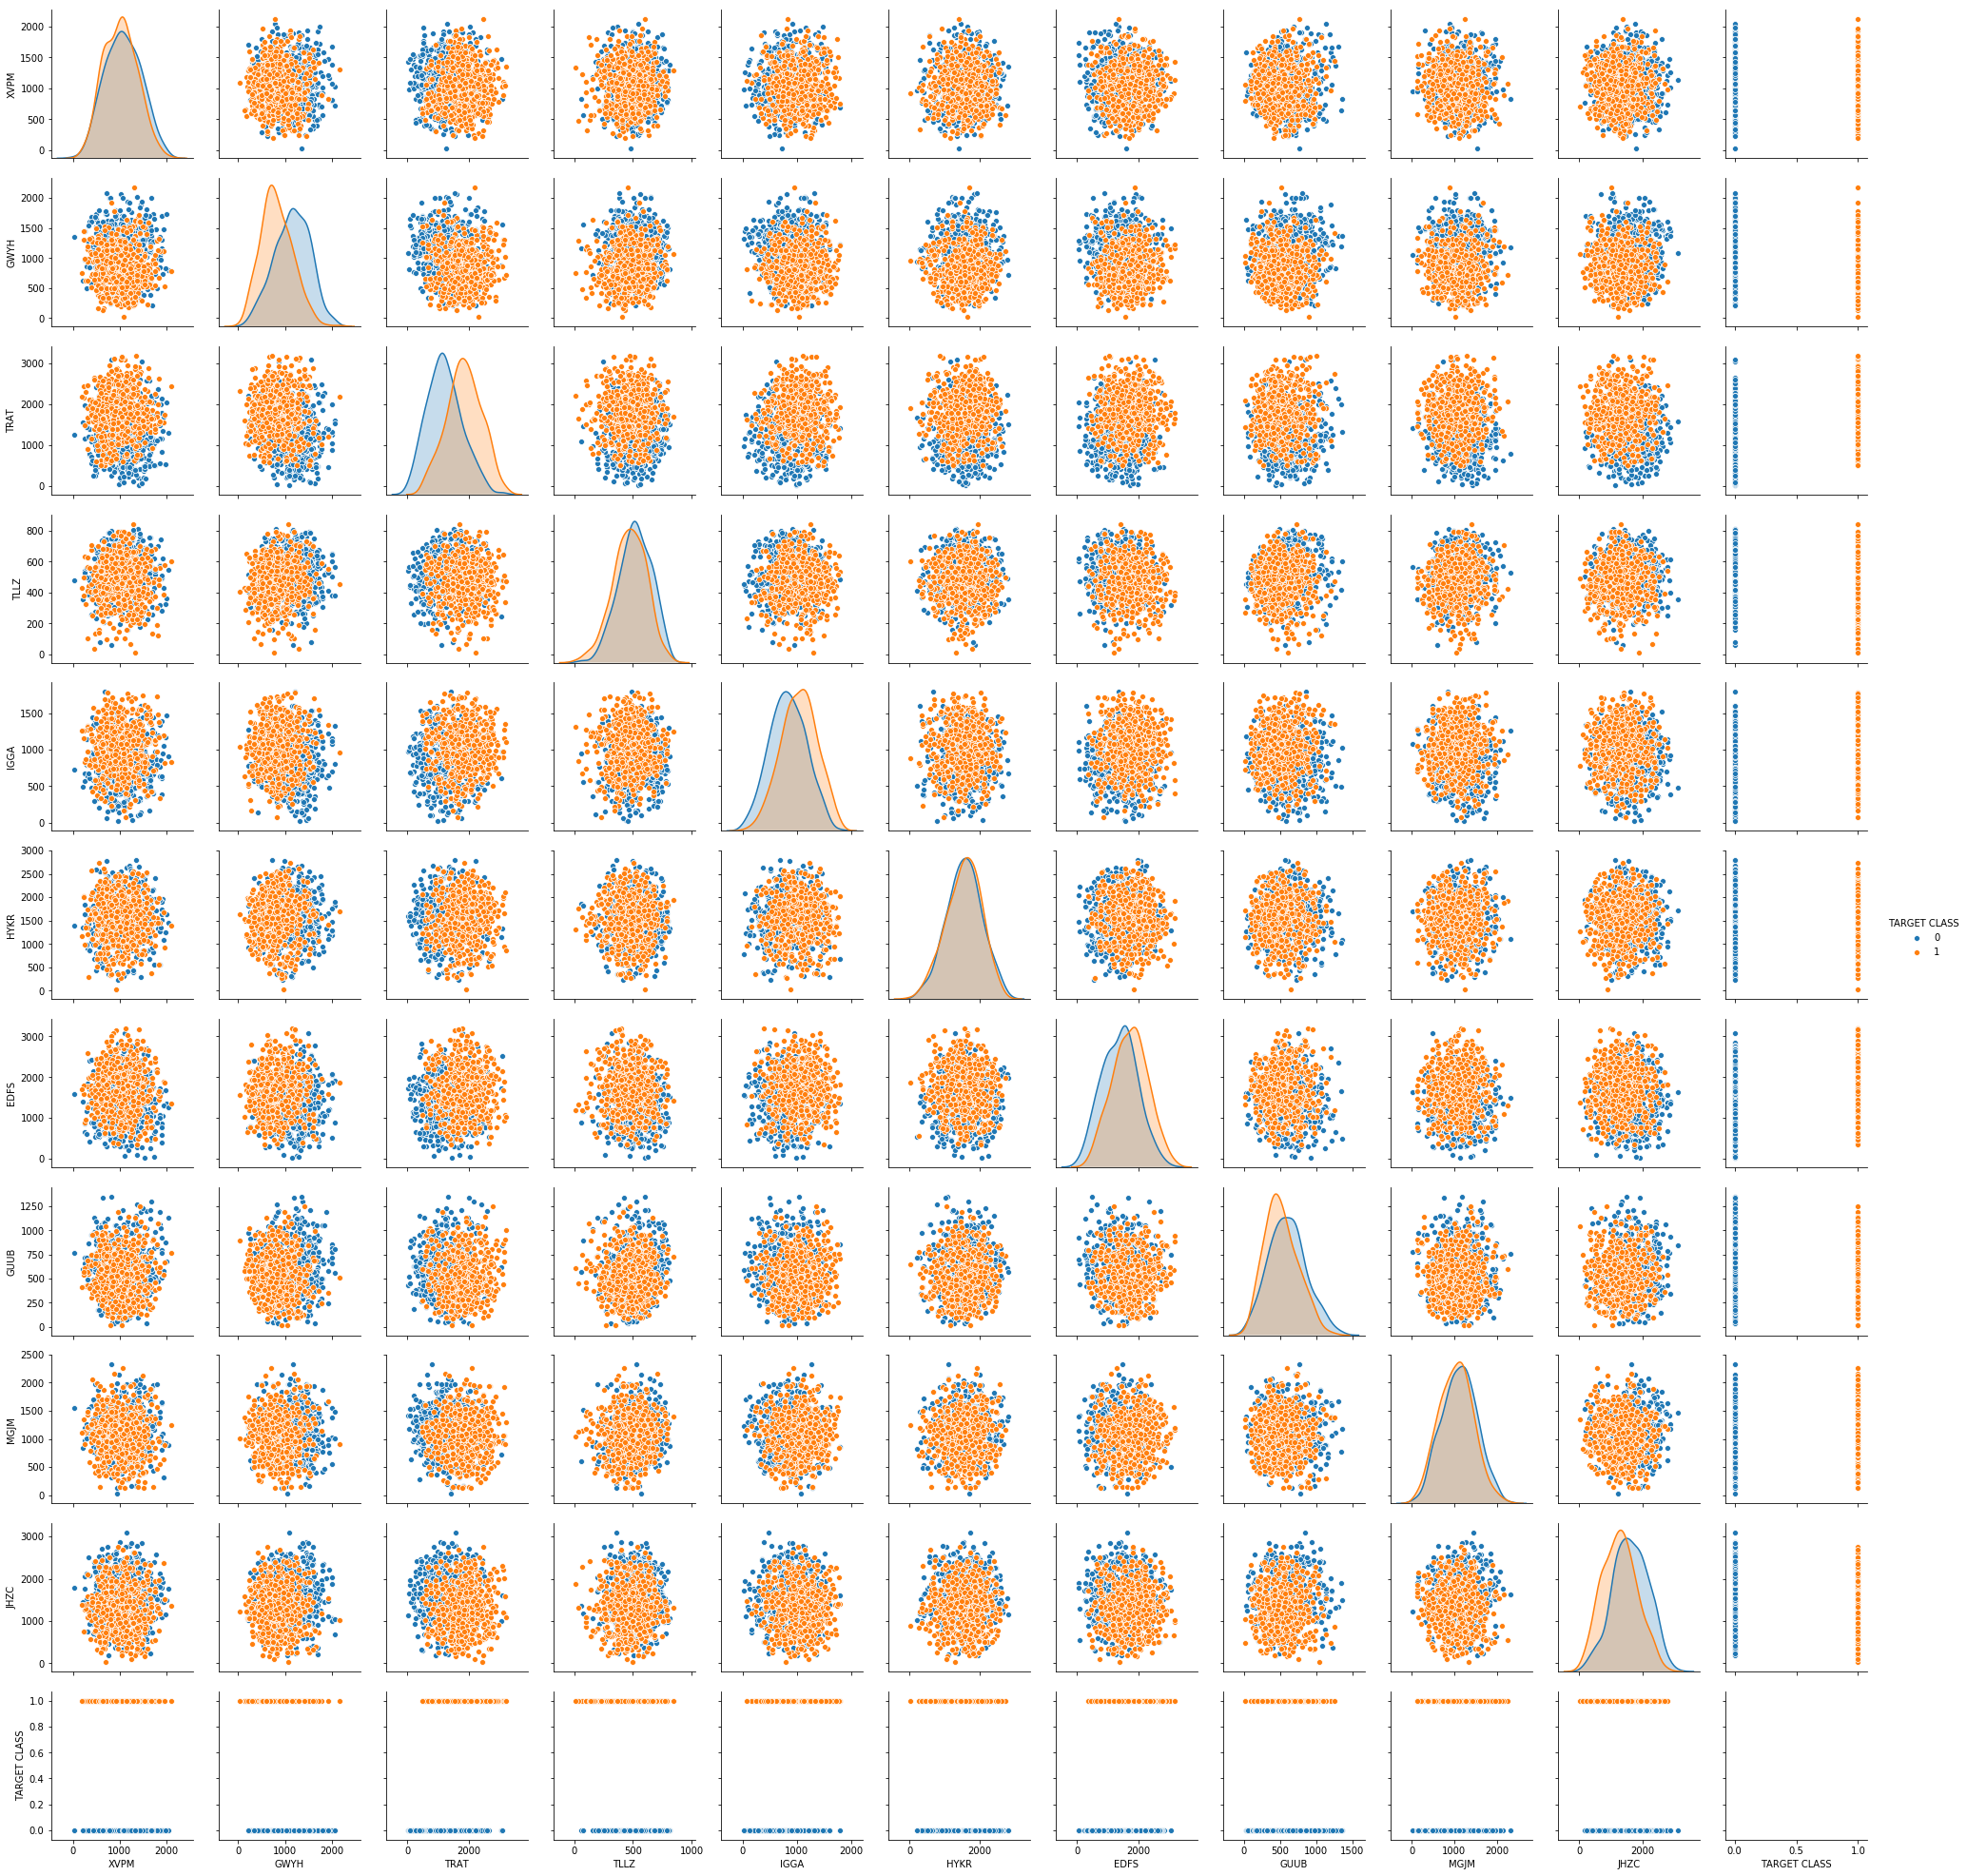

In [36]:
sns.pairplot(df,hue='TARGET CLASS')

### C). Standardize the Variables

* Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

* The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

In [37]:
#oimport standerdScaler 

from sklearn.preprocessing import StandardScaler

In [38]:
#Create an instance

scaler = StandardScaler()

In [39]:
#convert the data into scaler by using fit.
#we are dropping the target column which is not require in converting tinto standard scale

scaler.fit(df.drop('TARGET CLASS', axis=1))


#Note: in one step we can perform fit_transform for fit, transform steps.

StandardScaler(copy=True, with_mean=True, with_std=True)

In [40]:
#Now transform the scaler 

scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [41]:
#Now create a Pandas dataframe with above scaled_features data without target column

df_scaled = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_scaled.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

### D). Train_Test_Split

In [42]:
X = df_scaled
y = df['TARGET CLASS']

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### E). using KNN (K Nearest Neighbors)

* We are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.
* We will try train and error in bottom of notebook by increasing K value .

In [44]:
# import KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

In [45]:
#create instance and provide k value with n_neighbors

knn = KNeighborsClassifier(n_neighbors=1)

In [46]:
# Train the data

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [47]:
#predict the trained data

predictions = knn.predict(X_test)

### F). Predictions and Evaluations

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
#classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

   micro avg       0.72      0.72      0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [50]:
#confusion_matrix

print(confusion_matrix(y_test, predictions))

[[109  43]
 [ 41 107]]


### G). Chossing K value - Trail&Error 

* We can use Elbow method and see which one is having less error rate and pick that K value.

In [51]:
# Step 1: create Error_rate list with possible K values range. 
# np.mean(predict_k != y_test) for every K

error_rate = []

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    predict_k = knn.predict(X_test)
    error_rate.append(np.mean(predict_k != y_test))

In [52]:
#check the samples of error_rate

for i in range(0,3):
    print(error_rate[i])

0.28
0.29
0.21666666666666667


Text(0, 0.5, 'Error Rate')

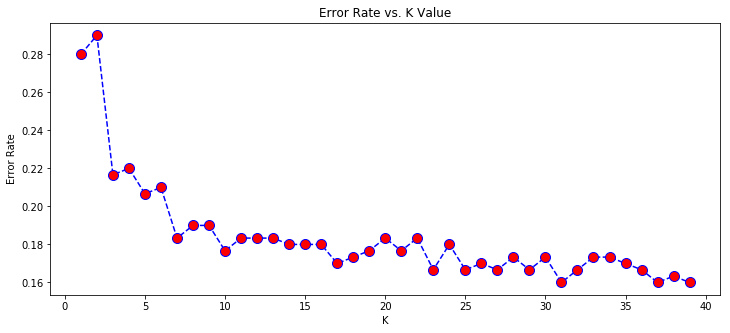

In [53]:
#Step 2: Plot the graph based on error_rate for each k value.

plt.figure(figsize=(12,5))
x = range(1,40)
y = error_rate

plt.plot(x, y , color='b', ls='--', marker='o', markerfacecolor='red', ms=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

* Here we can see that that after arouns K>30 the error rate just tends to lower around 0.06-0.05 
* Let's compare the k=1 and k=37

In [54]:
# K=1
print("KNN: K = 1")
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

print("Classification_report for K=1:\n", classification_report(y_test, predictions))
print("\n confusion_matrix for K=1:\n", confusion_matrix(y_test, predictions))

KNN: K = 1
Classification_report for K=1:
               precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

   micro avg       0.72      0.72      0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300


 confusion_matrix for K=1:
 [[109  43]
 [ 41 107]]


In [55]:
# K=37
print("KNN: K = 37")
knn = KNeighborsClassifier(n_neighbors=37)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

print("Classification_report for K=37:\n", classification_report(y_test, predictions))
print("\n confusion_matrix for K=37:\n", confusion_matrix(y_test, predictions))

KNN: K = 37
Classification_report for K=37:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       152
           1       0.82      0.86      0.84       148

   micro avg       0.84      0.84      0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300


 confusion_matrix for K=37:
 [[125  27]
 [ 21 127]]
